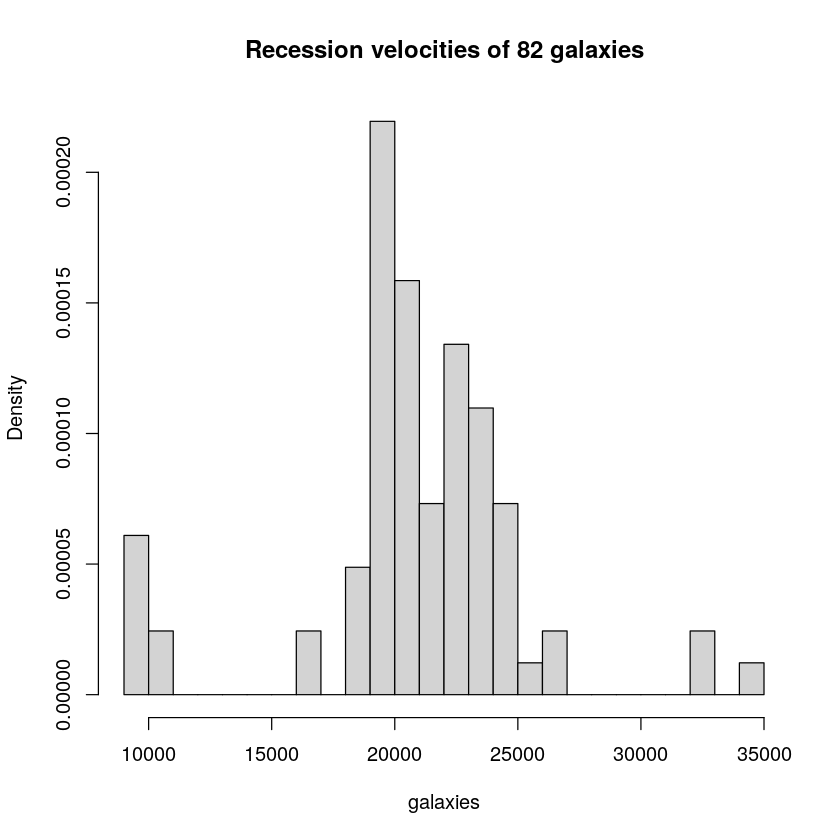

In [1]:
data(galaxies, package="MASS")
hist(galaxies, freq=FALSE, breaks=18, main="Recession velocities of 82 galaxies")

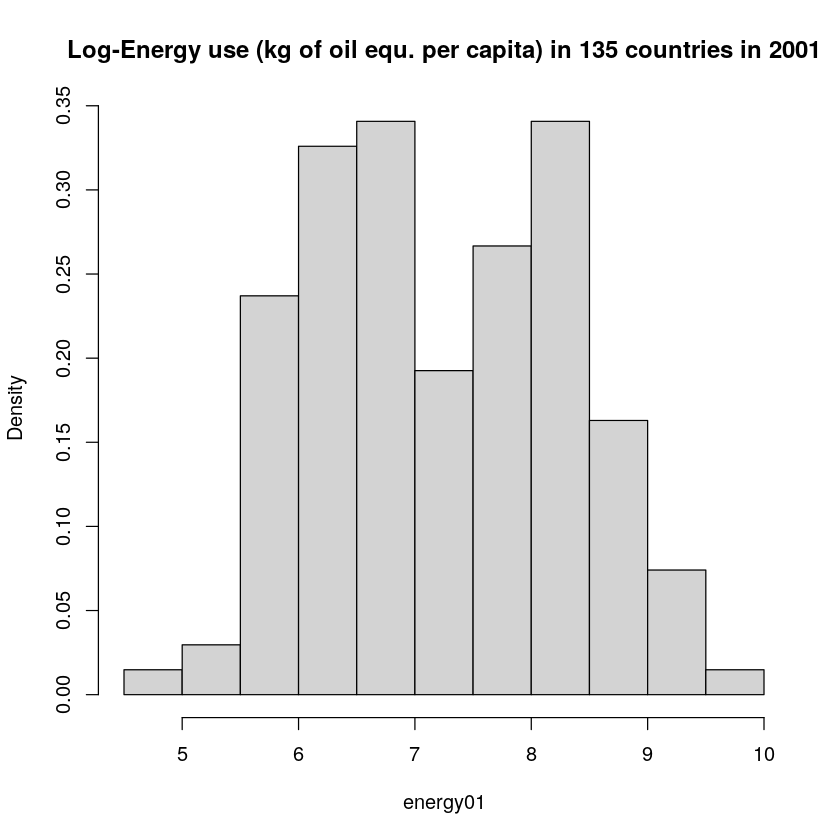

In [2]:
energy.use <-  read.csv("http://www.maths.dur.ac.uk/~dma0je/Data/energy.csv", header=TRUE)
energy01 <- log(energy.use[,c("X2001")])
hist(energy01,  main="Log-Energy use (kg of oil equ. per capita) in 135 countries in 2001" , 
  freq=FALSE)

In [3]:
estep <- function(dat, p, mu, sigma){         
   n <- length(dat)
   K <- length(mu) 
   W <- matrix(0, n,K)
   for (i in 1:n){
        W[i,]<- p/sigma*exp(-1/(2*sigma^2)*(dat[i]-mu)^2)/ 
        sum( p/sigma*exp(-1/(2*sigma^2)*(dat[i]-mu)^2))
      }
  return(W)
 }

In [4]:
mstep <- function(dat, W){                    
   n <- dim(W)[1]
   K <- dim(W)[2]
   
   p  <- apply(W,2,sum)/n
   mu <- apply(W*dat,2,sum)/apply(W,2,sum)
  
   diff <-matrix(0,n, K)
   for (k in 1:K){ diff[,k]<- (dat -mu[k])^2  }
   var   <- apply(W*diff,2,sum)/apply(W,2,sum)
   sigma <- sqrt(var)

  return(list("p"=p, "mu"=mu,  "sigma"=sigma))
} 

In [5]:
em <- function(dat,K, steps=400){                   
  p     <- rep(1/K,K)
  mu    <- quantile(dat, probs= (1:K)/K-1/(2*K))  
  sigma <- rep(sd(dat), K)
  
  s <- 1
  while (s <=steps){
    W   <- estep(dat, p, mu, sigma)
    fit <- mstep(dat, W)
    p   <- fit$p
    mu  <- fit$mu
    sigma <-fit$sigma
    s   <- s+1
 }
    fit<- list("p"=p, "mu"=mu, "sigma"=sigma,  "W" =W)
 return(fit)  
 }

In [6]:
fit.em1 <- em(galaxies, K=4)             
fit.em1$mu
fit.em1$sigma
fit.em1$p

[1]  9710.143 23185.905 19964.860 33044.335

[1]  422.5107 1633.3574 1385.2894  921.7177

[1] 0.08536585 0.39123845 0.48681039 0.03658531

In [7]:
fit.em2 <- em(energy01, K=2) 
fit.em2$mu
fit.em2$sigma
fit.em2$p

[1] 6.321075 8.080906

[1] 0.5259982 0.6735426

[1] 0.4769274 0.5230726

In [8]:
plot.mix<- function(dat, p, mu, sigma, breaks=25, dens=TRUE, ngrid=401, ...){
  try<-  hist(dat, breaks=breaks,  plot=FALSE)
  hist(dat, breaks=breaks, freq=FALSE, ylim=c(0, max(try$density)*1.3), 
       col="grey93" , border="grey85",...)
  r <- diff(range(dat))
  grid<- seq(min(dat)-0.15*r, max(dat)+0.15*r, length=ngrid)
  K<- length(p)
  if (length(sigma)==1){
    sigma<-rep(sigma, K)
  }
  grid.mat<- matrix(0, ngrid,K)
  for (j in 1:K){
    grid.mat[,j]<- p[j]*dnorm(grid, mu[j], sigma[j])
  }
  for (j in 1:K){
    lines(grid, grid.mat[,j], col=j+1, lwd=2)
  }
  if (dens){
    lines(grid, apply(grid.mat,1, sum), col=1,lwd=2)
  }   
  invisible()  
}

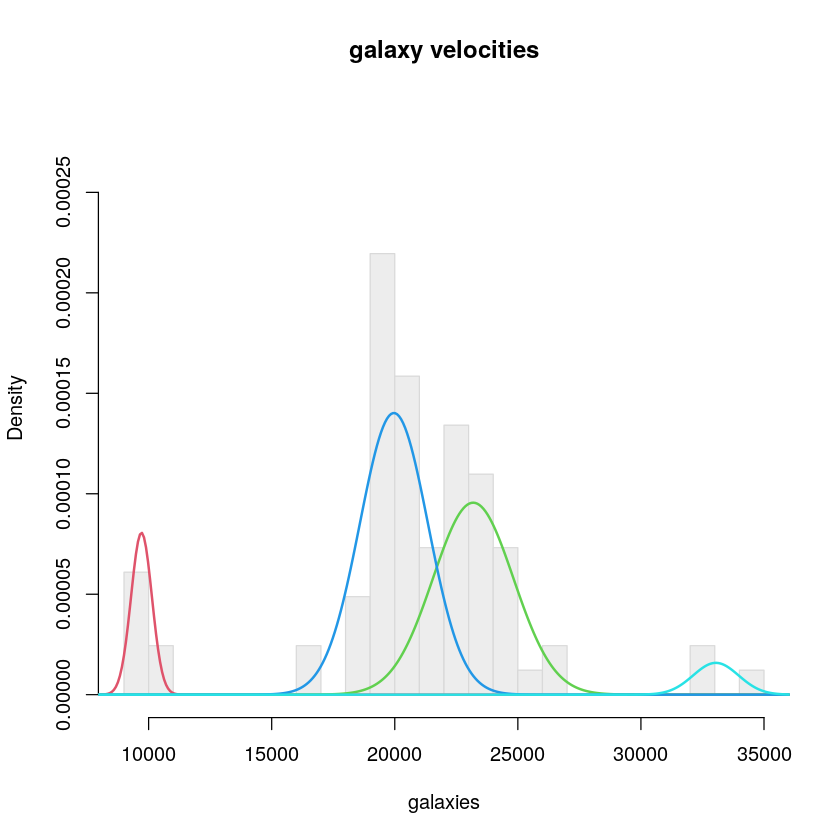

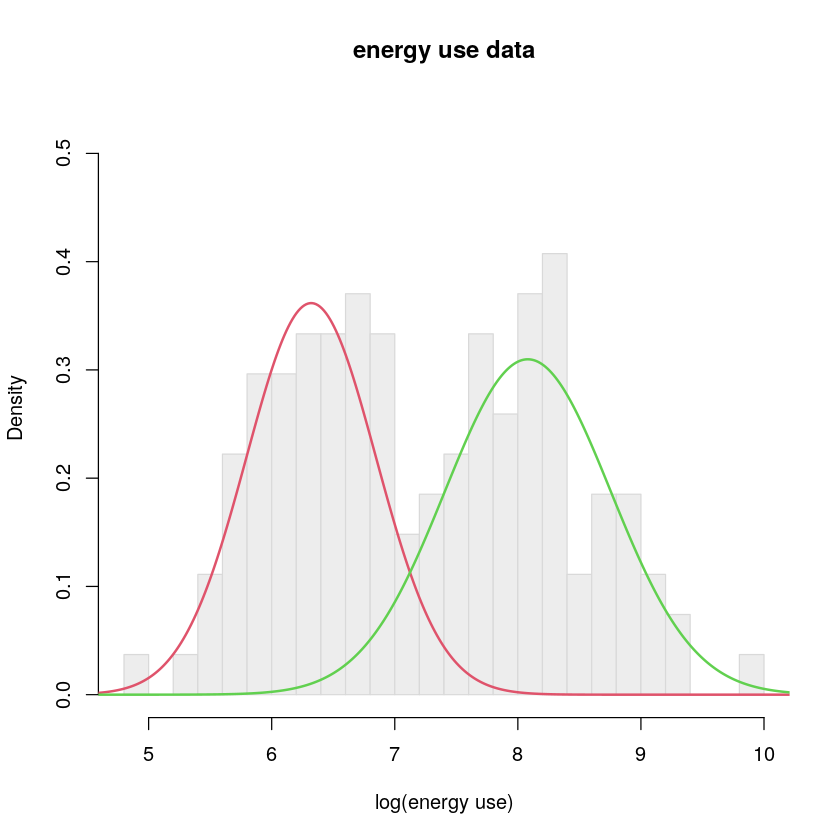

In [9]:
plot.mix(galaxies, fit.em1$p, fit.em1$mu, fit.em1$sigma, 
 main="galaxy velocities", xlab="galaxies",  dens=FALSE)  

plot.mix(energy01, fit.em2$p, fit.em2$mu, fit.em2$sigma,  
 main="energy use data", xlab="log(energy use)",  dens=FALSE) 

In [10]:
round(fit.em1$W[1:12,], digits=4)

1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
1,0.0000,0.0000,0
0,0.0027,0.9973,0
0,0.0029,0.9971,0
0,0.0176,0.9824,0
0,0.0201,0.9799,0


In [11]:
round(fit.em2$W[1:9,], digits=4) 

0.9672,0.0328
0.8406,0.1594
0.9773,0.0227
0.2409,0.7591
0.9496,0.0504
0.0001,0.9999
0.0016,0.9984
0.3471,0.6529
0.0000,1.0000


In [33]:
gauss.mix.sim<-function(n, p, mu, sigma){          
   x <- runif(n)
   sim <- rep(0,n)
   cp <- cumsum(p)
   for (i in 1:n){
       k <-1
       while (x[i]>cp[k]){
           k<-k+1
       }    
       sim[i] <- rnorm(1,mu[k],sigma[k])
   }
   return(sim)
}
x <- runif(100)
sim <- rep(0,100)


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] -0.904911052  1.181616788  0.877414395  0.965875570  1.002883718
   [6]  1.290458042  1.155796542 -0.545898811 -1.632513435  0.865210462
  [11]  0.015547750 -0.917138028  1.125801417  0.735369089 -0.887616477
  [16]  1.104949680  1.272197690 -1.154577625  0.843002671  1.122343538
  [21]  1.094886008 -0.258561261  1.453132585  1.004905035  0.507853929
  [26]  0.770733737 -0.546075193  0.619834427 -0.460633792 -0.890188524
  [31]  0.745826600 -0.044453863  1.218007695  0.684249176 -1.546133301
  [36] -1.472048226 -2.136298565 -0.995536279  0.928009531  1.209676805
  [41]  0.736822219  0.970507630  0.764658760  0.251043328 -0.847245622
  [46]  0.869672230  0.512892286  0.988848475  0.905877486  0.863925844
  [51]  0.609106669  0.595041020  0.777874811  1.143578066 -0.729144042
  [56]  0.859498048  0.993268942 -1.242051202 -1.565034305  0.408635635
  [61] -1.071709110  0.862291106  1.209789310 -1.970887564  1.261390456
  [66] -0.667011451  0.988993176  1.026840464  0.842764051 -0.794380243
  [71]  0.478090784  0.984636447  0.717784501  1.118248413 -1.453184548
  [76]  0.805529431  1.081289317  1.329884498  1.174448552  0.857810385
  [81]  1.270838230  1.140869013  0.609064537 -0.878217615 -0.536547223
  [86]  0.909318936 -1.225264683 -1.489261628  1.055281853  0.725679707
  [91]  0.716168211  0.773257446  0.964823215  0.980540621  0.826431294
  [96]  1.333807994 -1.701888482 -0.787574691 -0.605503542  1.207165536
 [101]  0.074007070 -1.257745680 -1.401948350  0.553514913  0.658902303
 [106]  1.314480706  1.411771460 -0.614141724  0.509722356 -0.374338227
 [111]  0.890590724  0.841610844 -0.801292337  1.009806668 -1.045559975
 [116]  0.947904953  0.860417876  0.861181454  0.651403835 -1.592476964
 [121]  1.260594476  1.065990167  1.248189009  0.960883082  0.905156558
 [126]  0.669912650 -1.181522062 -0.566345159 -1.314024234 -0.417466447
 [131]  1.146626802  1.177044700  0.847021566  0.963713047  1.300153413
 [136] -1.258351057  1.025890032 -2.001336766 -1.242437613 -2.081719995
 [141]  1.114579018 -1.264058104 -0.314320126  0.864545959 -0.806067704
 [146]  1.105203439  0.688164092  0.997993643  0.652202933 -0.416462269
 [151]  0.729143991  0.993323954  0.942235411  0.952002080  0.721392985
 [156] -0.846154778 -0.603183769 -1.653238690  1.337335274 -1.096847574
 [161] -0.417576711  1.032241749  0.998011643 -0.219810633 -1.086924504
 [166]  1.118359972 -0.755246665  1.013804437  0.886068990  0.598078174
 [171]  0.987031030  0.755518491 -0.280235384  0.840414285 -2.301975338
 [176] -0.823078276  1.357900419 -1.186905290 -1.094626557  0.742353526
 [181]  1.107245120  0.714270514 -0.534599863  1.209811819 -1.298276692
 [186]  1.378784028 -1.068937166  1.092811153  1.214486611  0.886412899
 [191]  1.204968675 -0.568652632  1.188838582  0.734916914 -0.751465748
 [196]  0.939128907  0.973739596 -0.494295903 -0.850580505 -1.104579132
 [201]  0.866943350  1.255670135 -1.061590191 -0.797287790  0.538331606
 [206]  0.991163230 -1.486875232 -0.315926859  0.655244748  0.984485966
 [211]  0.872450743  1.035816793  1.419171919  1.225762898 -1.326969921
 [216] -1.833248301 -1.723216394  0.789582368  0.781620399 -1.485339074
 [221]  1.351551924  0.882567339  1.353420066  0.535446294  0.667029625
 [226]  1.248470932 -0.898950376 -0.538287265  1.243141863  1.002677458
 [231] -1.130655709  1.126834816 -0.853551996 -1.027222466  0.861068504
 [236]  1.060928346 -1.817387214  1.143673656  1.266324784  1.065640999
 [241]  0.941576048  1.046256764  1.261411609  1.199203580  0.144752281
 [246]  0.008640264 -0.907377963  0.865516143  0.014714186  1.136768581
 [251] -0.892181981  0.926513106  1.529414986 -0.929601985 -1.116130932
 [256] -0.782390701  0.737958644  1.140248629 -1.787475294 -1.374225712
 [261]  0.810807657 -0.694022135  0.591876268  0.833558521 -0.618943147
 [266]  1.114304291 -1.350396844  1.005555321  1.268564606 -0.940506647
 [271]  1.126511799 -0.987145133  0.722395018 -0.711857435 -0.745166365
 [276] -1.677266896  1.248984450  1.0382389

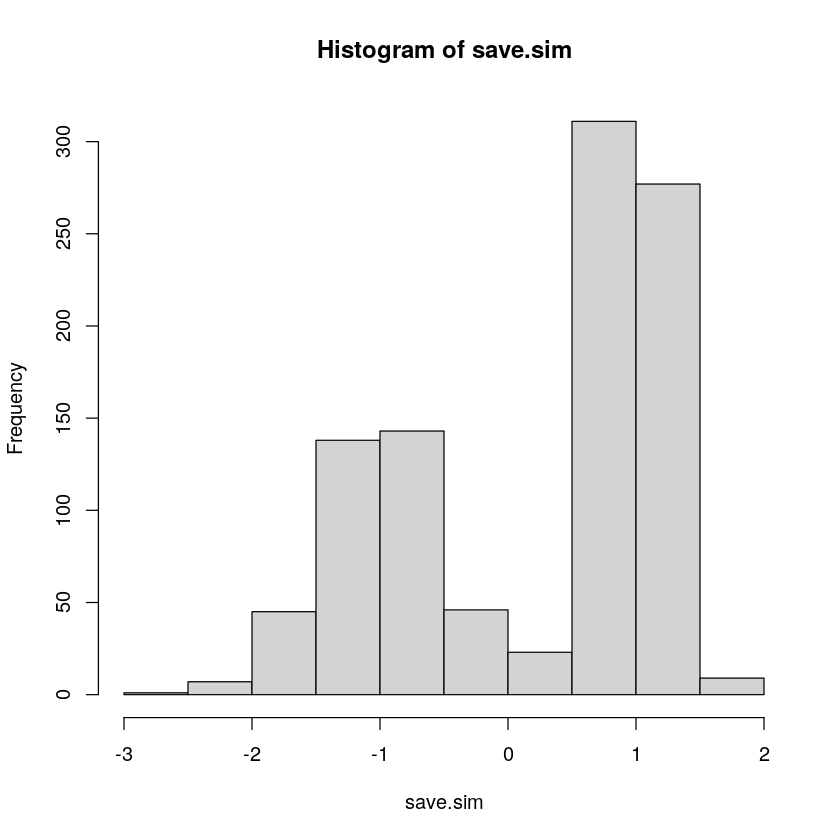

In [34]:
save.sim <- gauss.mix.sim(1000,c(0.4,0.6), 
           c(-1,1), c(1/2,1/4))    
hist(save.sim)  
save.sim

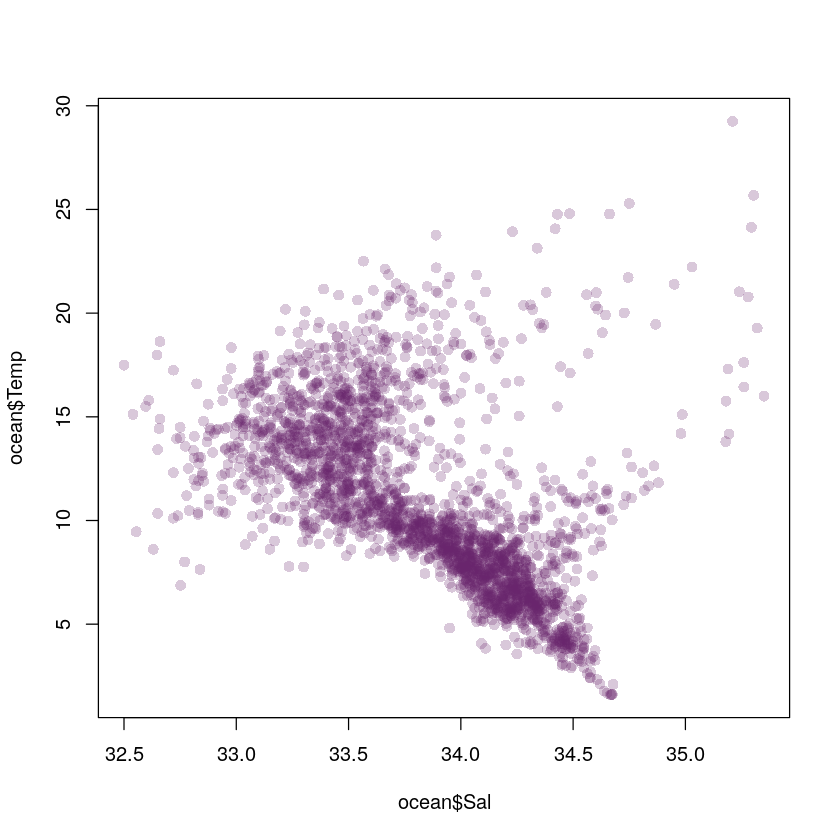

In [14]:
ocean <- read.table("http://www.maths.dur.ac.uk/~dma0je/Data/ocean.dat", header=TRUE, sep=",")
plot(ocean$Sal, ocean$Temp, col="#68246d40", pch=16, cex=1.2)

Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following objects are masked _by_ ‘.GlobalEnv’:

    em, estep, mstep




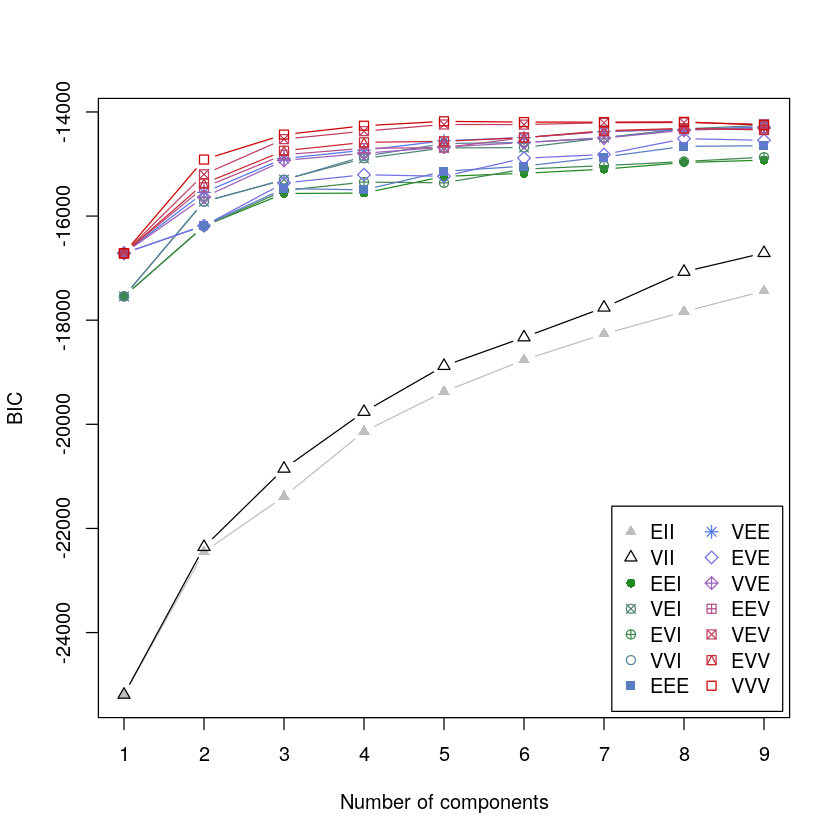

In [15]:
require(mclust)
set.seed(105)
ocean.fit <- Mclust(cbind(ocean$Sal, ocean$Temp))
plot(ocean.fit, what="BIC")

In [16]:
ocean.fit$BIC

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -25193.29 -25193.29 -17542.16 -17542.16 -17542.16 -17542.16 -16714.69
2 -22450.72 -22356.23 -16190.87 -15725.04 -16198.47 -15718.84 -16178.57
3 -21386.57 -20852.60 -15566.73 -15299.34 -15509.42 -15306.24 -15471.90
4 -20140.07 -19760.89 -15558.21 -14892.62 -15347.32 -14852.11 -15496.16
5 -19375.09 -18878.38 -15238.22 -14691.44 -15361.55 -14607.44 -15139.91
6 -18764.13 -18329.34 -15178.04 -14684.25 -15097.44 -14586.12 -15040.68
7 -18264.97 -17757.53 -15098.67 -14494.91 -15031.32 -14494.86 -14865.55
8 -17835.73 -17070.37 -14971.79 -14325.18 -14951.75 -14325.58 -14661.21
9 -17439.38 -16709.34 -14925.33 -14257.84 -14868.97 -14316.53 -14648.43
        VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -16714.69 -16714.69 -16714.69 -16714.69 -16714.69 -16714.69 -16714.69
2 -15545.58 -16185.59 -15636.03 -15446.24 -15198.05 -15374.26 -14914.03
3 -14893.97 -15365.00 -14

Warning message in mclust2Dplot(data = data[, dimens, drop = FALSE], what = "classification", :
“more symbols needed to show classification ”


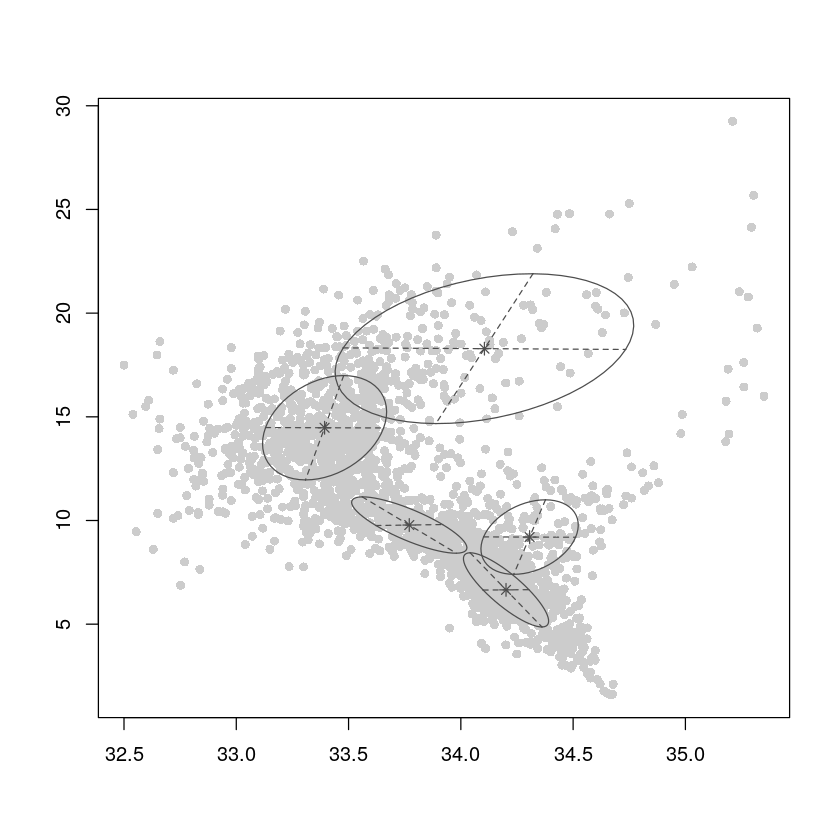

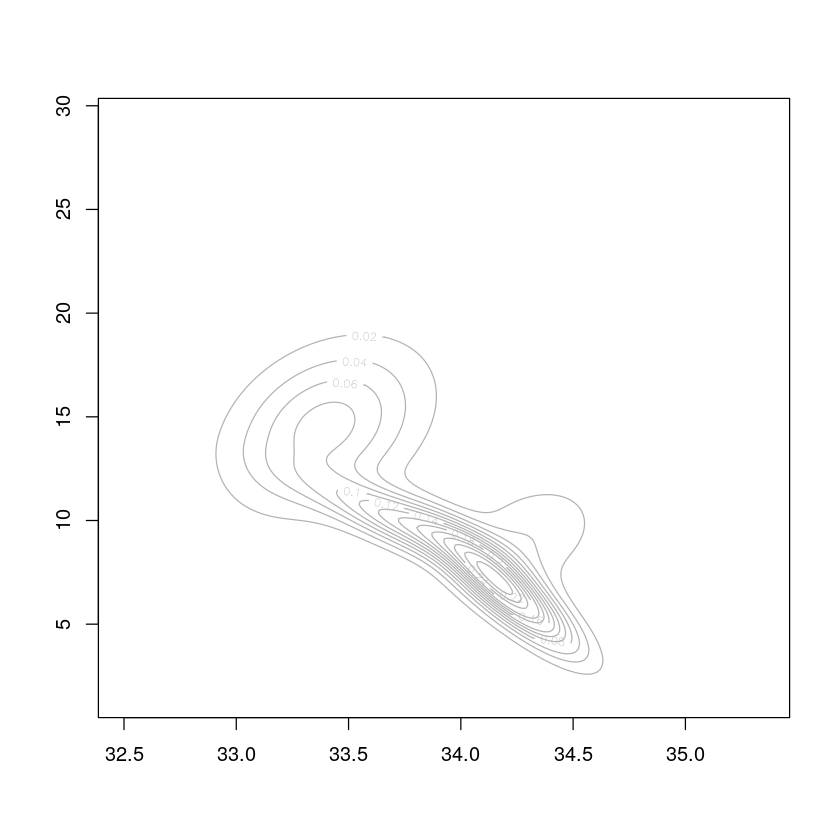

In [17]:
plot(ocean.fit, what="classification",   col="grey80", symbols=0)
plot(ocean.fit, what="density")

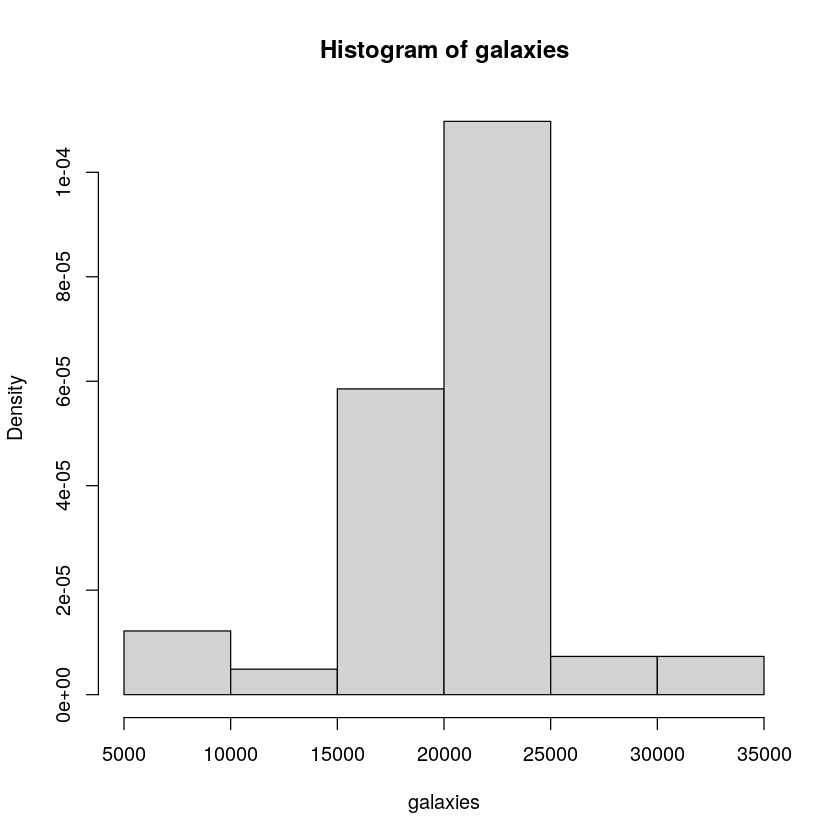

In [18]:
data(galaxies, package="MASS")
hist(galaxies, freq=FALSE)

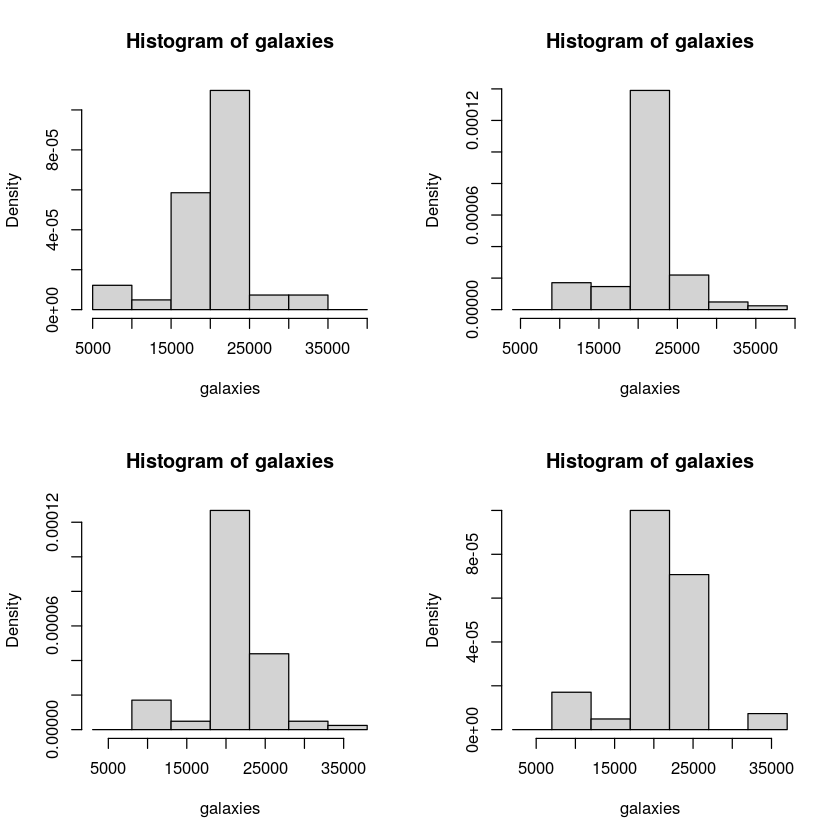

In [19]:
par(mfrow=c(2,2))
hist(galaxies, freq=FALSE, breaks=seq(5000, 40000, by=5000))
hist(galaxies, freq=FALSE, breaks=seq(4000, 39000, by=5000))
hist(galaxies, freq=FALSE, breaks=seq(3000, 38000, by=5000))     
hist(galaxies, freq=FALSE, breaks=seq(2000, 37000, by=5000))

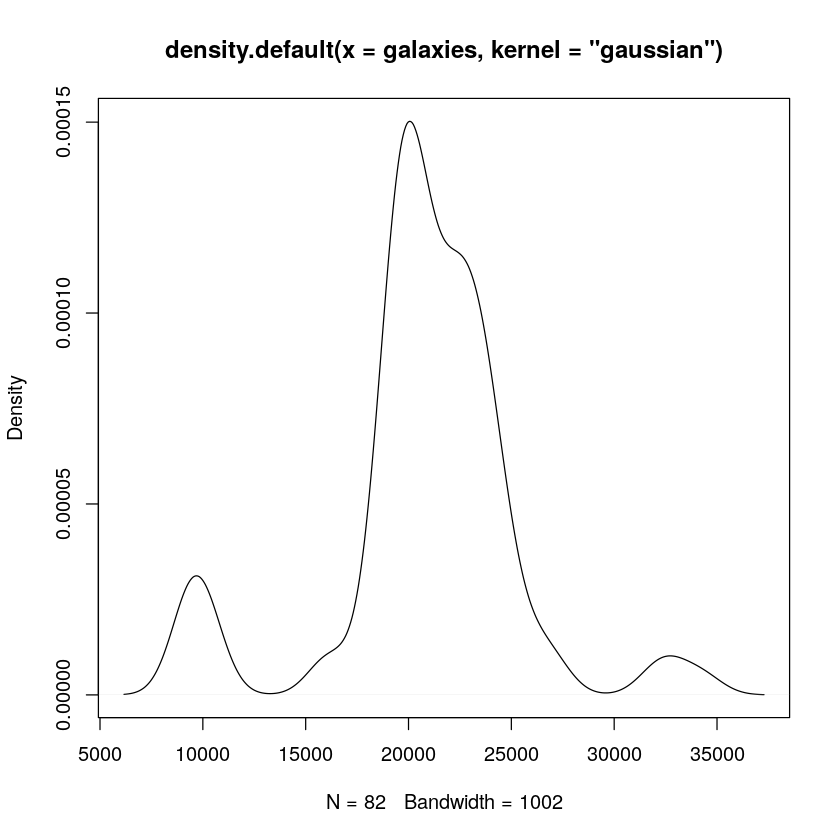

In [20]:
plot(density(galaxies, kernel="gaussian"))

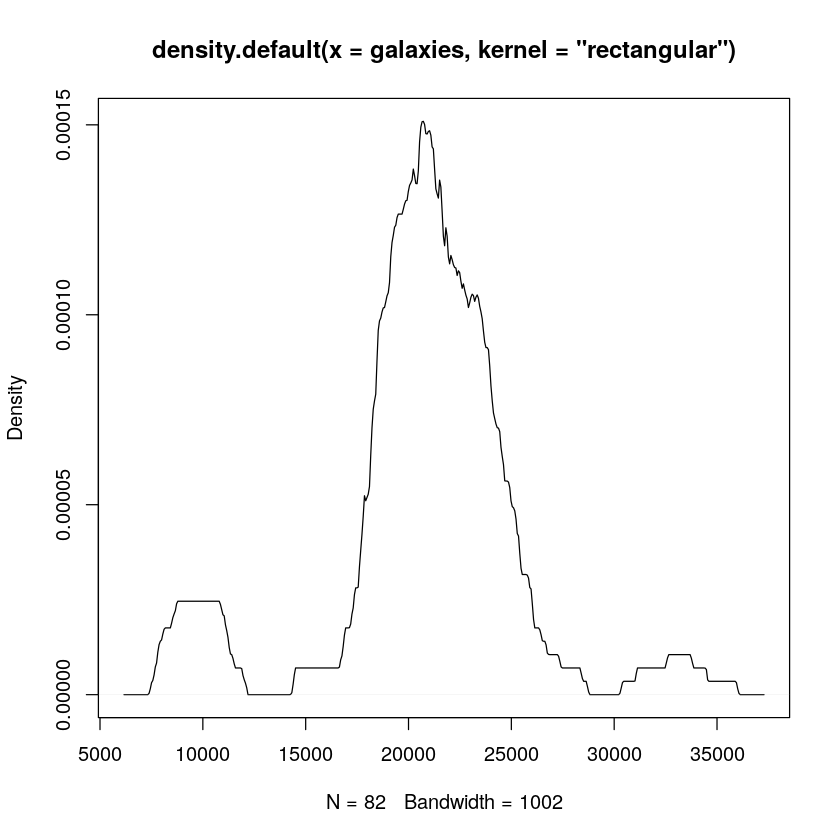

In [21]:
plot(density(galaxies,kernel="rectangular"))

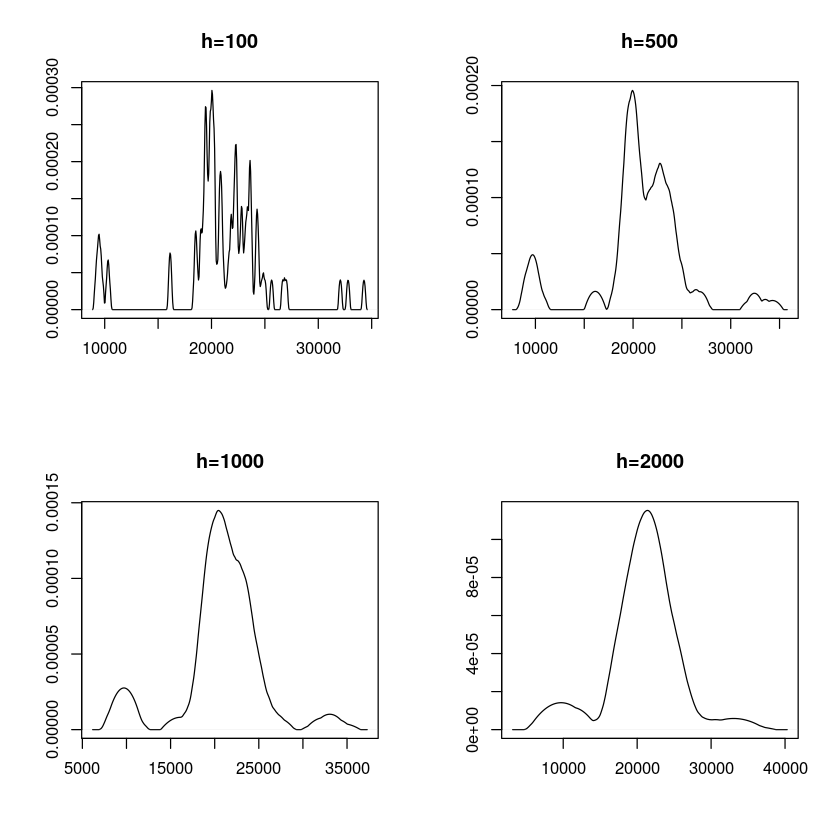

In [22]:
par(mfrow=c(2,2))
plot(density(galaxies, kernel="epanechnikov",  adjust=0.1),  xlab="",ylab="", main="h=100")
plot(density(galaxies, kernel="epanechnikov", adjust=0.5), xlab="", ylab="", main="h=500")
plot(density(galaxies, kernel="epanechnikov"),  xlab="",ylab="", main="h=1000")
plot(density(galaxies, kernel="epanechnikov", adjust=2), xlab="", ylab="", main="h=2000")

Loading required package: MASS



[1] 100 100

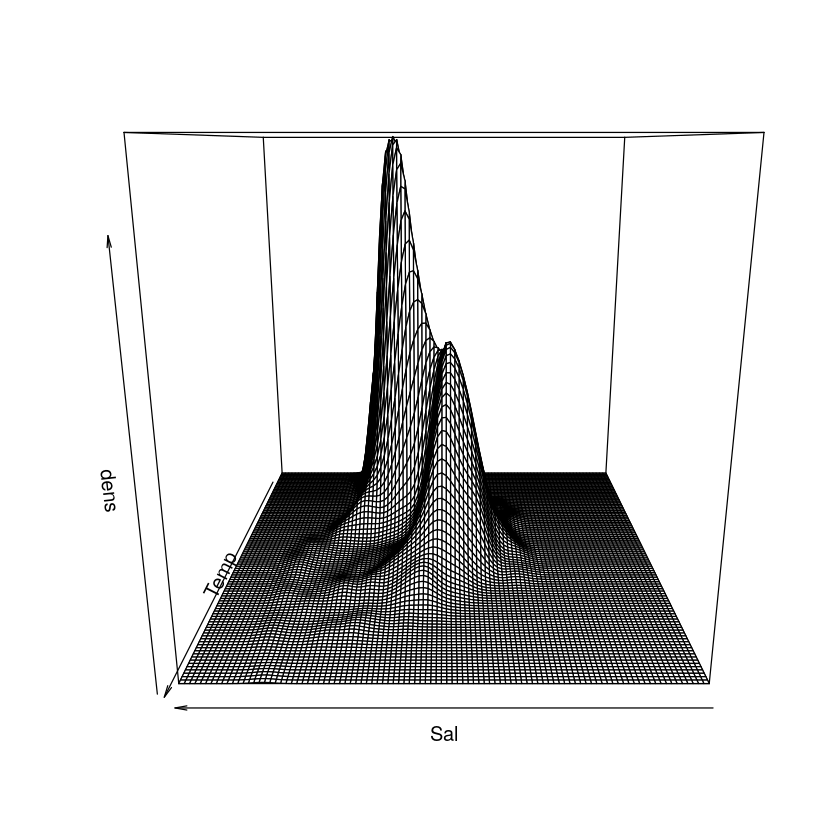

In [23]:
require(MASS)
ocean.kde<- kde2d(ocean$Sal, ocean$Temp, n=100, lims=c(31,36,0,30))
dim(ocean.kde$z)
persp(ocean.kde$z, theta=180, xlab="Sal", ylab="Temp", zlab="dens")

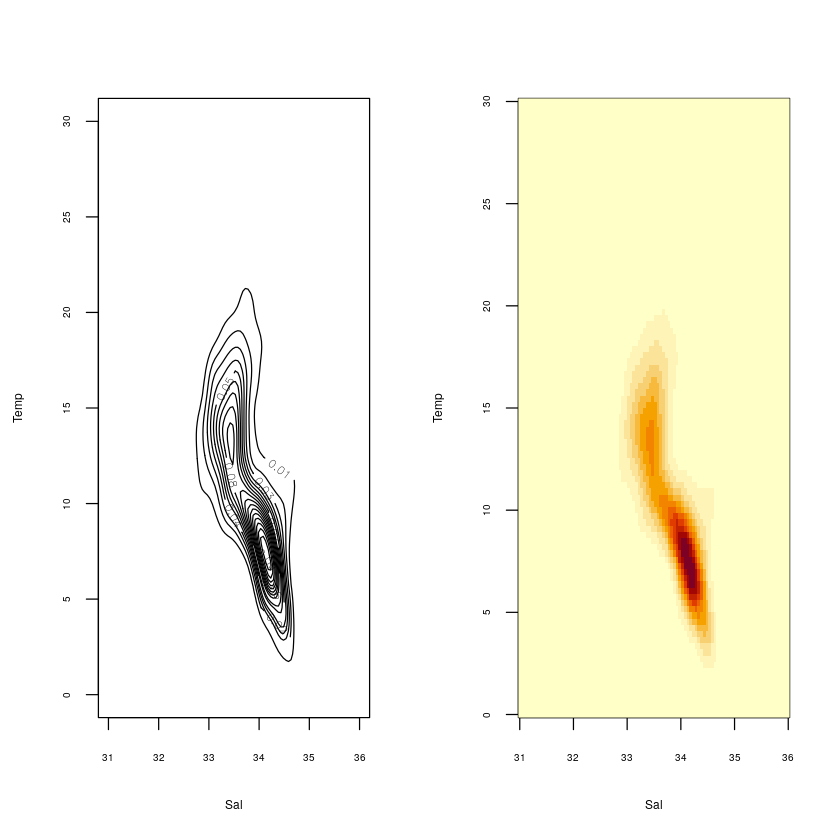

In [24]:
par(mfrow=c(1,2),  cex.lab=0.6, cex.axis=0.5)
contour(ocean.kde$x, ocean.kde$y, ocean.kde$z,xlab="Sal", ylab="Temp", nlevels=20)
image(ocean.kde$x, ocean.kde$y,ocean.kde$z, xlab="Sal", ylab="Temp")

Loading required package: ks



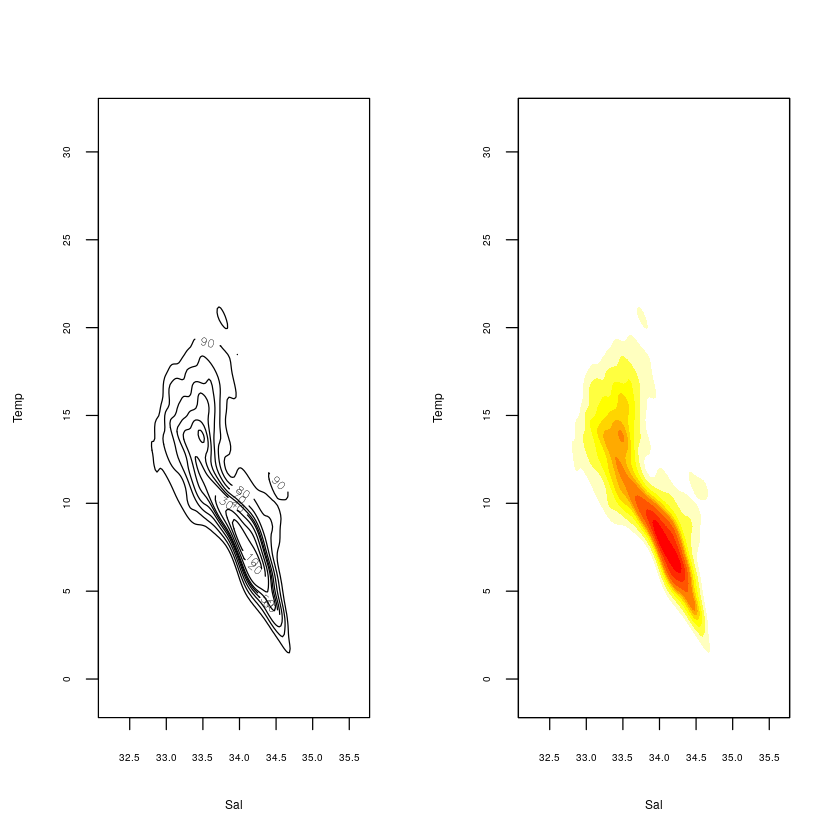

In [25]:
require(ks)

ocean.kde2 <- kde(cbind(ocean$Sal, ocean$Temp))

par(mfrow=c(1,2),  cex.lab=0.6, cex.axis=0.5)
plot(ocean.kde2, cont=seq(10, 100, 10),xlab="Sal", ylab="Temp")
plot(ocean.kde2, cont=seq(10, 100, 10),xlab="Sal", ylab="Temp", display="filled.contour")

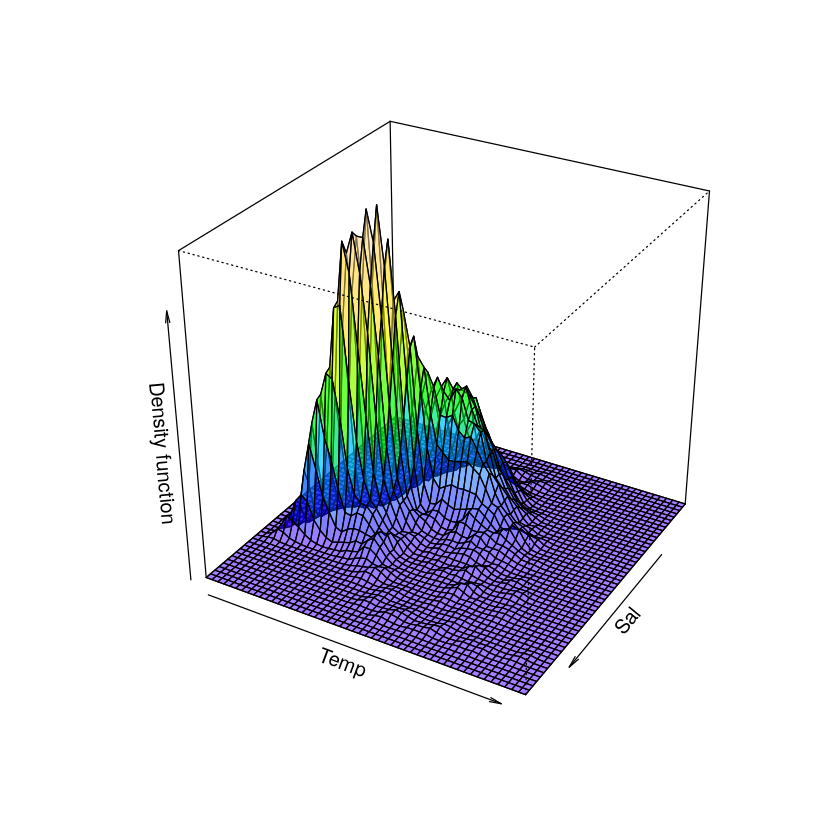

In [26]:
plot(ocean.kde2, cont=seq(10, 100, 10), display="persp",xlab="Sal", ylab="Temp", theta=120,phi=30)